In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import open3d as o3d
import math
import os
import seaborn as sns

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [6]:
# directory containing .csv files containing mean and gaussian curvature values for each vacuole
os.listdir()

['.ipynb_checkpoints',
 '90th percentile curvatures.png',
 'A_vac14_1361_11_4_BG_scaled_MLtaub_GC.csv',
 'A_vac14_1361_11_4_BG_scaled_MLtaub_GC.csv.png',
 'A_vac14_1361_11_4_BG_scaled_MLtaub_MC.csv',
 'A_vac14_1361_11_4_BG_scaled_MLtaub_MC.csv.png',
 'B_wt_BY4741A_1463_31_9_BG_scaled_MLtaub_GC.csv',
 'B_wt_BY4741A_1463_31_9_BG_scaled_MLtaub_GC.csv.png',
 'B_wt_BY4741A_1463_31_9_BG_scaled_MLtaub_MC.csv',
 'B_wt_BY4741A_1463_31_9_BG_scaled_MLtaub_MC.csv.png',
 'confocal SXT mesh comparison.ipynb',
 'confocal-SXT mesh comparisons_BG.ipynb',
 'ConfvsSXT_GC.png',
 'ConfvsSXT_MC.png',
 'C_BY471_vph1gfp_1208_2_2_18_BG_scaled_MLtaub_GC.csv',
 'C_BY471_vph1gfp_1208_2_2_18_BG_scaled_MLtaub_GC.csv.png',
 'C_BY471_vph1gfp_1208_2_2_18_BG_scaled_MLtaub_MC.csv',
 'C_BY471_vph1gfp_1208_2_2_18_BG_scaled_MLtaub_MC.csv.png',
 'D_vac14_1361_11_2_BG_scaled_MLtaub_GC.csv',
 'D_vac14_1361_11_2_BG_scaled_MLtaub_GC.csv.png',
 'D_vac14_1361_11_2_BG_scaled_MLtaub_MC.csv',
 'D_vac14_1361_11_2_BG_scaled_MLtaub_MC.

In [3]:
## Fig 6. Curvature histograms & violin plots
# read ply-> csv files, column H

# populate two dictionaries with MC and GC datasets for each vacuole
fn_ID = ["A_", "D_", "G_", "B_", "E_", "H_","C_", "F_", "I_"]
vac_ID = ['A', 'D', 'G', 'B', 'E', 'H', 'C', 'F', 'I']

MC_dict = {}
GC_dict = {}

i = 0
while i<9:
    for fn in os.listdir():
        if fn_ID[i] in fn and "MC" in fn:
#         print(fn)
            ply = pd.read_csv(fn)
            colH = ply['Unnamed: 7'].tolist()
            MC = [x for x in colH if not(math.isnan(x))]
#             print(i, fn, len(MC))
#             plt.hist(MC, bins=50)
#             plt.xlabel("H ($μm^{-1}$)",style='italic')
#             plt.savefig(fn + ".png")
#             plt.clf()
            MC_dict.update({vac_ID[i]:MC})
        elif fn_ID[i] in fn and "GC" in fn:
#         print(fn)
            ply = pd.read_csv(fn)
            colH = ply['Unnamed: 7'].tolist()
            GC = [x for x in colH if not(math.isnan(x))]
#             print(i, fn, len(MC))
#             plt.hist(GC, bins=50)
#             plt.xlabel("K ($μm^{-1}$)",style='italic')
#             plt.savefig(fn + ".png")
#             plt.clf()
            GC_dict.update({vac_ID[i]:GC})
    i+=1
        

# GC_dict['C']


In [4]:
MC_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in MC_dict.items() ]))
GC_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in GC_dict.items() ]))

Text(0, 0.5, 'H ($μm^{-1}$)')

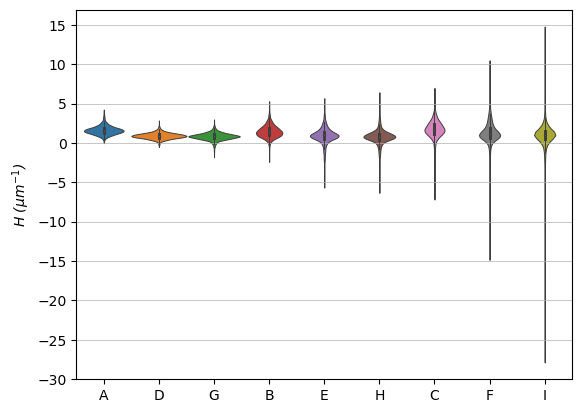

In [5]:
sns.violinplot(MC_df, width=1, linewidth=0.7, fill=False, inner='box')
plt.grid(linewidth=0.5, axis='y')
plt.yticks(np.arange(-30,20,5))
plt.ylabel("H ($μm^{-1}$)",style='italic')
# plt.savefig('H_violins.png')

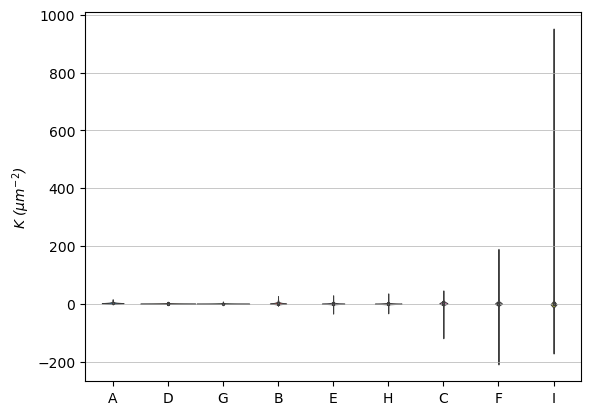

In [8]:
sns.violinplot(GC_df, width=1, linewidth=0.7, fill=False, inner='box')
plt.grid(linewidth=0.5, axis='y')
# plt.yticks(np.arange(-20,20))
plt.ylabel("K ($μm^{-2}$)",style='italic')
# plt.ylim([-20,20])
plt.savefig('K_violins.png')

In [13]:
# plot willmore energies
fig6_table = pd.read_excel('Table S3_Fig5.xlsx')
fig6_table

,Unnamed: 0,A,B,C,D,E,F,G,H,I
0,Volume (um3),1.005,1.443,1.304,5.802,5.523,6.316,7.25,9.767,9.65
1,Sphericity,0.673,0.628,0.497,0.674,0.628,0.469,0.67,0.629,0.464
2,Mean Curvature (avg (st.dev.)),1.624 (0.534),1.45 (0.79),1.637 (1.355),0.915 (0.365),0.919 (1.070),1.199 (1.686),0.842 (0.449),0.766 (1.015),0.825 (1.766)
3,Gaussian Curvature (avg (st.dev)),2.657 (2.031),2.04 (3.03),1.892 (7.757),0.846 (0.754),0.893 (3.527),-0.0211 (15.853),0.722 (0.846),0.635 (3.352),0.254 (17.333)
4,SA,4.876,6.411,7.664,15.718,8.175,23.291,18.195,23.418,30.858
5,Willmore energy (WE),1.294734,4.401793,20.108757,1.537649,8.963569,158.933033,3.461599,22.996031,109.403367
6,WE/SA,0.265532,0.6866,2.623794,0.097827,1.096461,6.823796,0.19025,0.981981,3.545381


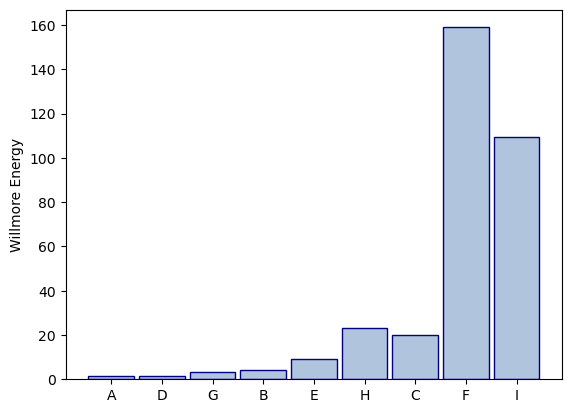

In [58]:
vac_ID = ['A', 'D', 'G', 'B', 'E', 'H', 'C', 'F', 'I']

we_list = fig6_table.loc[5, :].values.flatten().tolist()
we_list = [we_list[1:]]
we_reordered = [we_list[0][0],we_list[0][3],we_list[0][6],we_list[0][1],we_list[0][4],we_list[0][7],we_list[0][2],we_list[0][5],we_list[0][8]]
we_reordered
plt.bar(vac_ID, we_reordered, width=0.9,color='lightsteelblue', edgecolor = 'navy')
plt.ylabel('Willmore Energy')
plt.savefig('willmore energy_reordered.png')

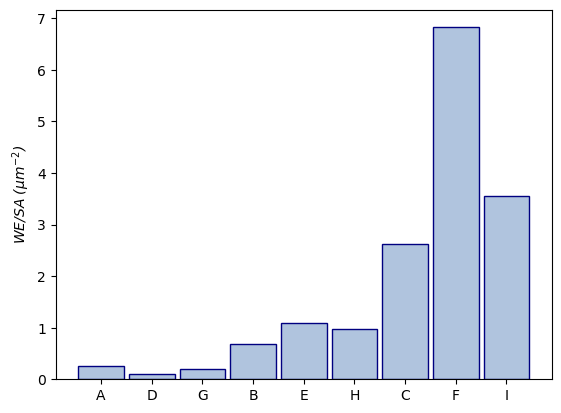

In [61]:
wed_list = fig6_table.loc[6, :].values.flatten().tolist()
wed_list = [wed_list[1:]]
wed_reordered = [wed_list[0][0],wed_list[0][3],wed_list[0][6],wed_list[0][1],wed_list[0][4],wed_list[0][7],
                 wed_list[0][2],wed_list[0][5],wed_list[0][8]]


plt.bar(vac_ID,wed_reordered,width=0.9,color='lightsteelblue', edgecolor = 'navy')
plt.ylabel("WE/SA ($μm^{-2}$)",style='italic')
plt.savefig('willmore energy density_reordered.png')

In [8]:
# Fig 6A - SXT whole vacuole & interface curvature
int_curv_data = "Table S4_Fig6A.xlsx"
whole_org_curv_df = pd.read_excel(int_curv_data, sheet_name='whole organelles')
nuc_int = pd.read_excel(int_curv_data, sheet_name='interface Nuc')
vac_int = pd.read_excel(int_curv_data, sheet_name='interface Vac')

In [10]:
whole_org_curv_df
nuc_int
vac_int

,Vac MC,Vac GC
0,-0.587931,1.159804
1,0.322404,0.004380
2,0.360822,0.000004
3,-0.023149,0.000210
4,-0.367470,0.000347
...,...,...
64,-0.009417,-0.000049
65,-0.026716,0.000489
66,0.345159,0.001709
67,0.019567,0.000243


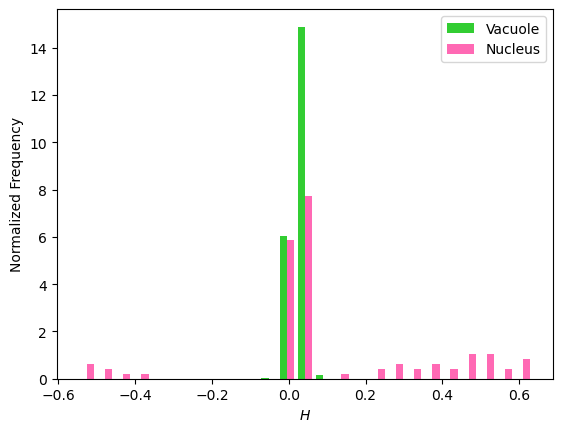

In [51]:
# Fig 6Ai
plt.figure()
int_mc = [whole_org_curv_df['Vac MC'], nuc_int['Nuc MC']]
colors = ['limegreen','hotpink']
# plt.hist(vac_int['Vac MC'], bins=50)
# plt.hist(vac_int['Vac MC'], bins=50)
plt.hist(int_mc, bins=25, color=colors, density=True)
plt.legend(['Vacuole', 'Nucleus'])
plt.xlabel('H', style='italic')
plt.ylabel('Normalized Frequency')
plt.savefig('whole vac nuc MC_b25.png')

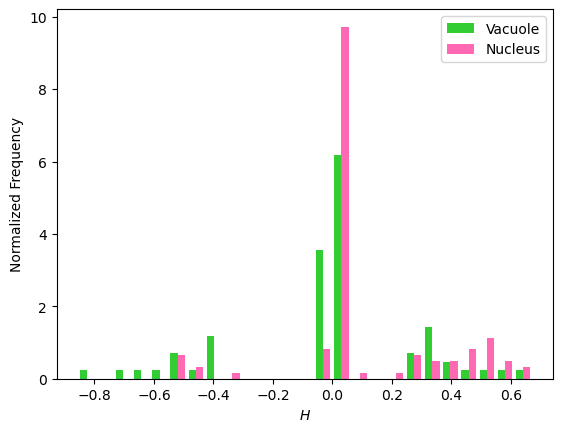

In [48]:
# Fig 6Aii.
plt.figure()
int_mc = [vac_int['Vac MC'], nuc_int['Nuc MC']]
colors = ['limegreen','hotpink']
# plt.hist(vac_int['Vac MC'], bins=50)
# plt.hist(vac_int['Vac MC'], bins=50)
plt.hist(int_mc, bins=25, color=colors, density=True)
plt.legend(['Vacuole', 'Nucleus'])
plt.xlabel('H', style='italic')
plt.ylabel('Normalized Frequency')
plt.savefig('interface MC_norm_b25.png')

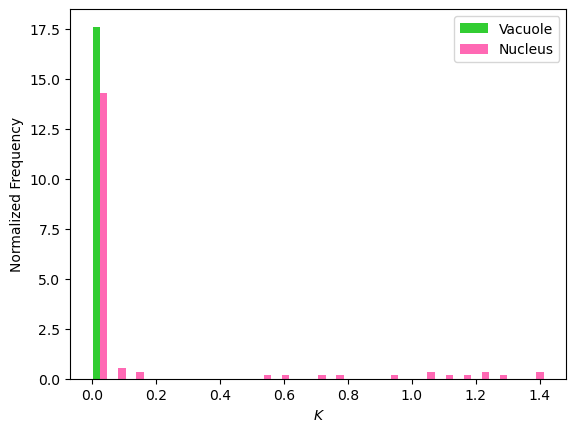

In [50]:
# Fig 6Aiii.
plt.figure()
int_mc = [whole_org_curv_df['Vac GC'], nuc_int['Nuc GC']]
colors = ['limegreen','hotpink']
# plt.hist(vac_int['Vac MC'], bins=50)
# plt.hist(vac_int['Vac MC'], bins=50)
plt.hist(int_mc, bins=25, color=colors, density=True)
plt.legend(['Vacuole', 'Nucleus'])
plt.xlabel('K', style='italic')
plt.ylabel('Normalized Frequency')
plt.savefig('whole vac nuc GC_b25.png')

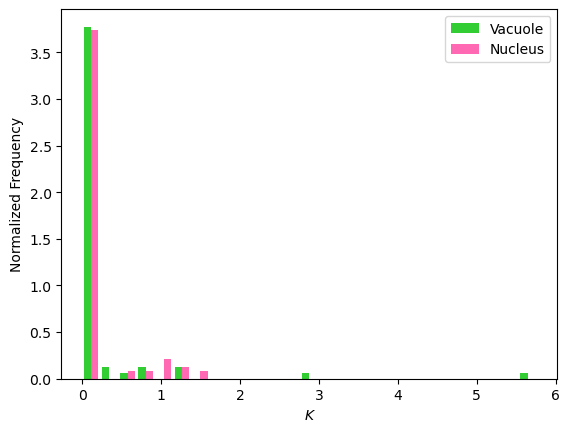

In [49]:
# Fig 6Aiv.
plt.figure()
int_mc = [vac_int['Vac GC'], nuc_int['Nuc GC']]
colors = ['limegreen','hotpink']
# plt.hist(vac_int['Vac MC'], bins=50)
# plt.hist(vac_int['Vac MC'], bins=50)
plt.hist(int_mc, bins=25, color=colors, density=True)
plt.legend(['Vacuole', 'Nucleus'])
plt.xlabel('K', style='italic')
plt.ylabel('Normalized Frequency')
plt.savefig('interface GC_norm_b25.png')